# Conventional Deep CNN Models Evaluation
input files: training history of each model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import os
from sources import util

%matplotlib inline

#### List of CNN Models to Analyze:
**Models:** VGG16, DenseNet169, InceptionV3, MobileNetV2, NASNetMobile, ResNet152, Xception <br />
**Base:** pretrained imagenet models <br />
**PCA:** introduce PCA on top layers <br />

In [2]:
# model types:
types = ['_Base', '_PCA']

# CNN Models:
models = ['VGG16', 'DenseNet169', 'InceptionV3', 'MobileNetV2', 'NASNetMobile', 'ResNet152', 'Xception']

# All Models being Evaluated Grouped by Structures
all_models = []
for model in models:
    all_models.append([])
    for t in types:
        all_models[-1].append(model + t)

## Training Process
The training history of each model was stored in the train_history csv files.

Here, we are comparing the changing trend of several metrics of four shallow models during the training process.

### Load Training History

In [3]:
def load_training_history(type_name, model_name, histories = {}):
    
    '''
    type_name: whether the model is the base model or the post PCA model
    model_name: one of the CNN models
    histories: dictionary stored training history data
    
    This function is used to load all training histories from various csv files.
    '''
    
    name = model_name + type_name
    file = name + '-train_history.csv'
    file_path = os.path.join('Saved_files', 'history', file)
    df = pd.read_csv(file_path, index_col = 0)
    histories[name] = df
    print(f'{name} file loaded')
    return histories

In [4]:
# load training histories for all models
histories = {}
for model in models:
    for t in types:
        histories = load_training_history(t, model, histories)

VGG16_Base file loaded
VGG16_PCA file loaded
DenseNet169_Base file loaded
DenseNet169_PCA file loaded
InceptionV3_Base file loaded
InceptionV3_PCA file loaded
MobileNetV2_Base file loaded
MobileNetV2_PCA file loaded
NASNetMobile_Base file loaded
NASNetMobile_PCA file loaded
ResNet152_Base file loaded
ResNet152_PCA file loaded
Xception_Base file loaded
Xception_PCA file loaded


## Visualize Model Performance

In [53]:
def model_performance(model_name, cols, rows = ['Loss', 'Accuracy', 'AUC']):
    
    '''
    model_name: one of the CNN models
    cols: all models that are being evaluated
    rows: metrics used for model evaluation
    
    This function is used to visualize the model performance using selected metrics.
    The results will be stored in the report_image directory.
    '''
    
    fig, axe = plt.subplots(3,2,figsize=(14,10))
    for ax, col in zip(axe[0], cols):
        ax.set_title(col, fontsize=12)
    for ax, row in zip(axe[:,0], rows):
        ax.set_ylabel(row, rotation=90, fontsize=12)
    for i in range(2):
        df = histories[cols[i]]
        data_cols = [['loss', 'val_loss'], ['accuracy', 'val_accuracy'], ['auc', 'val_auc']]
        for j in range(3):
            data = np.array(df[data_cols[j]])
            axe[j, i].plot(data)
            axe[j, i].legend(['Train', 'Test'])
            axe[j, i].set_xlabel('# Epochs')
    fig.tight_layout()
    fig.savefig('report_images/' + model_name + '_train_history.png', dpi=200)

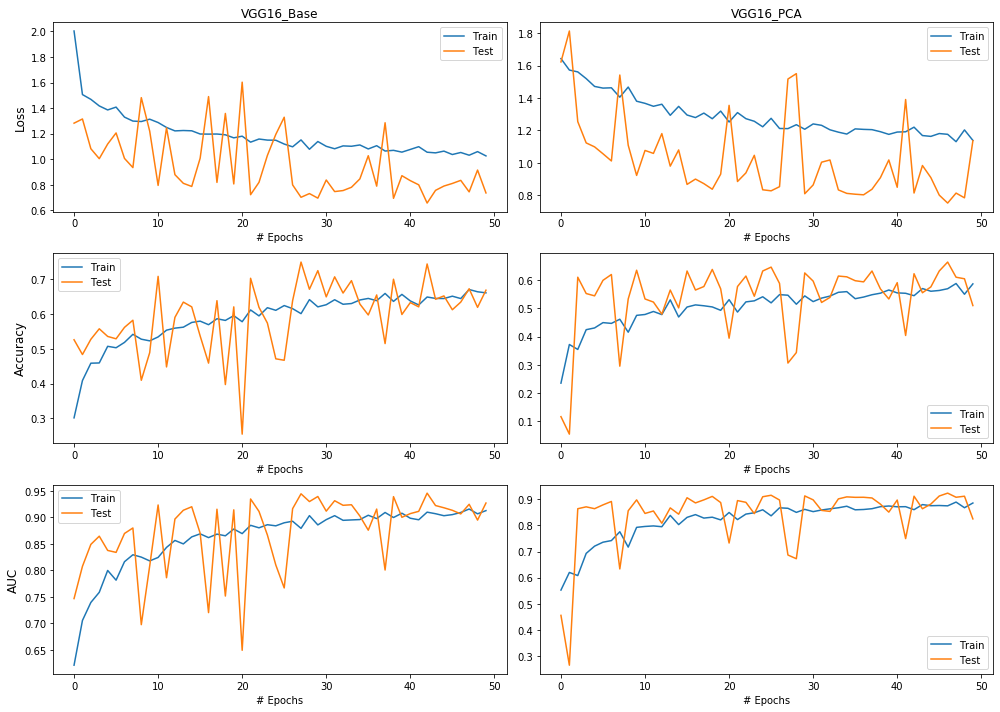

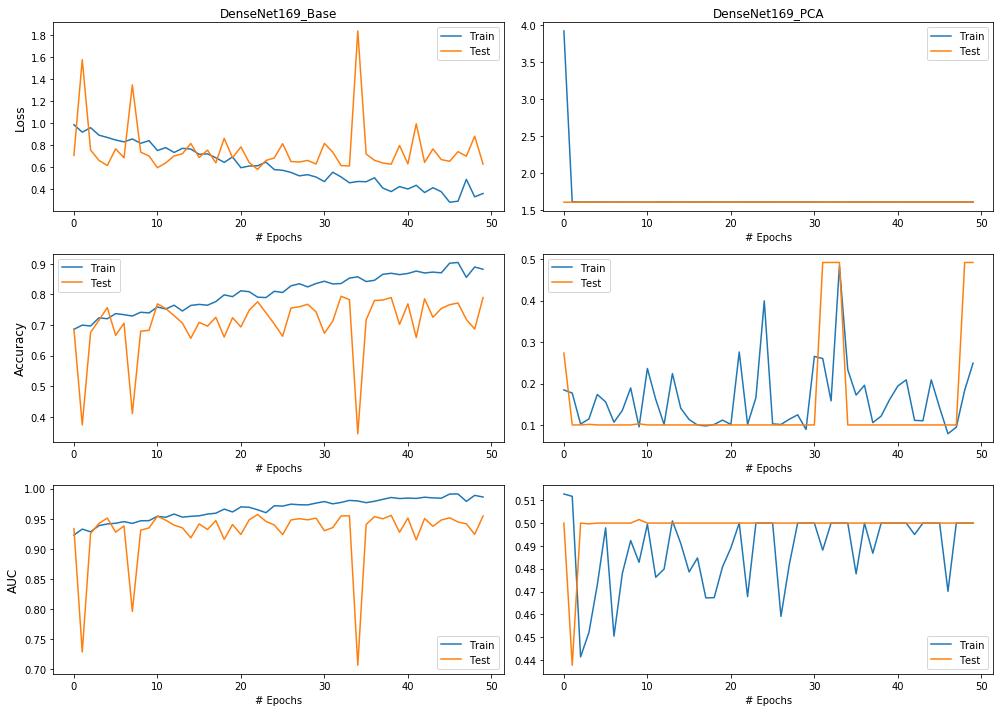

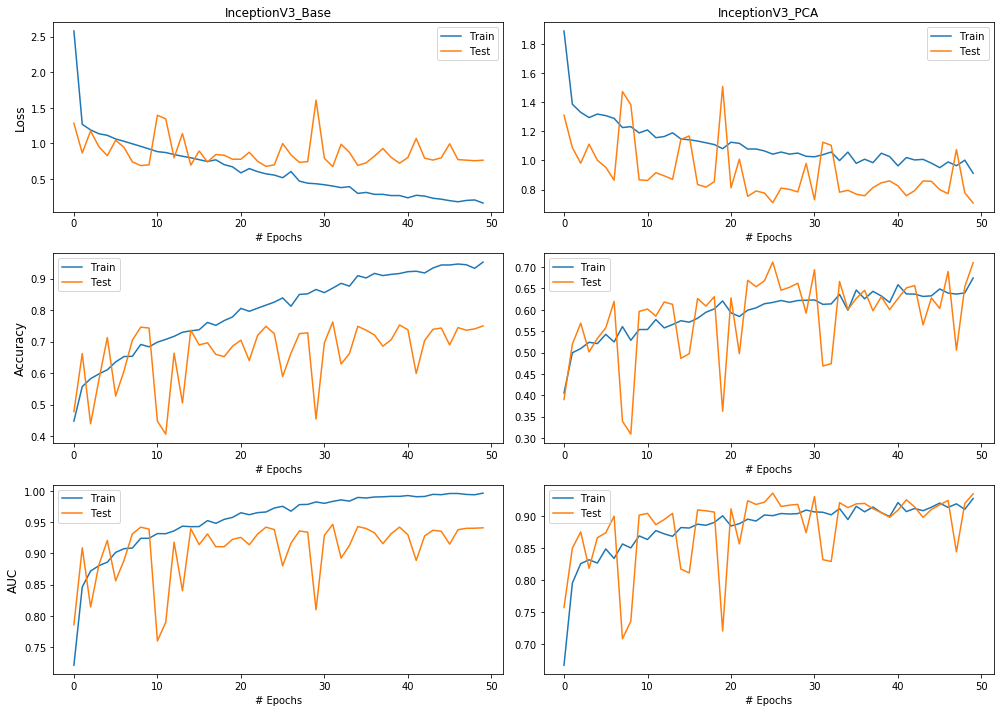

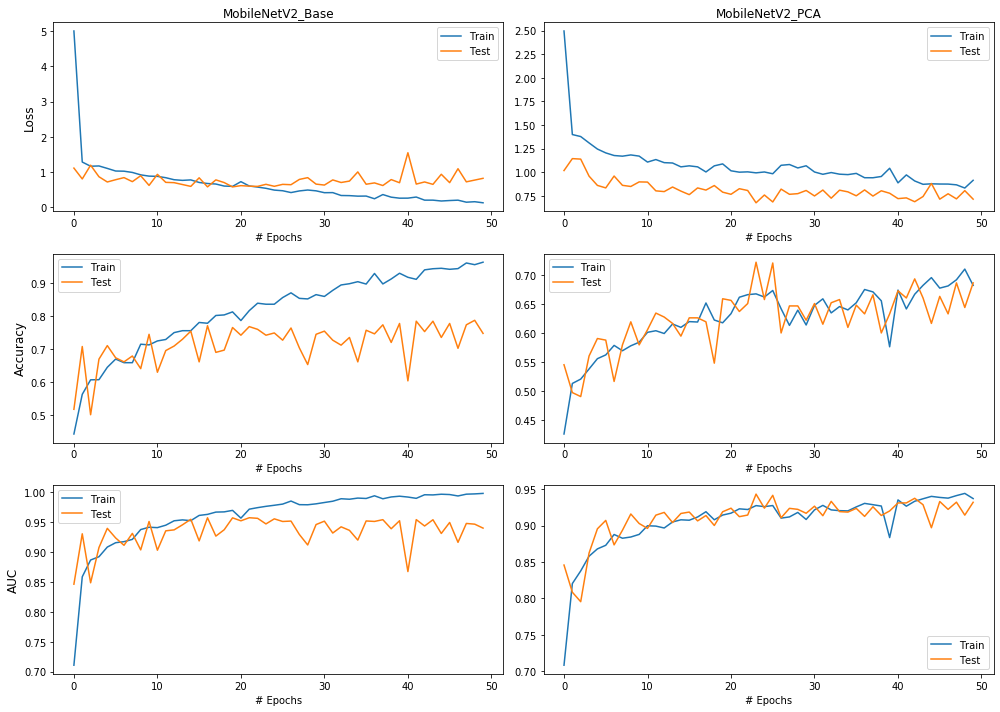

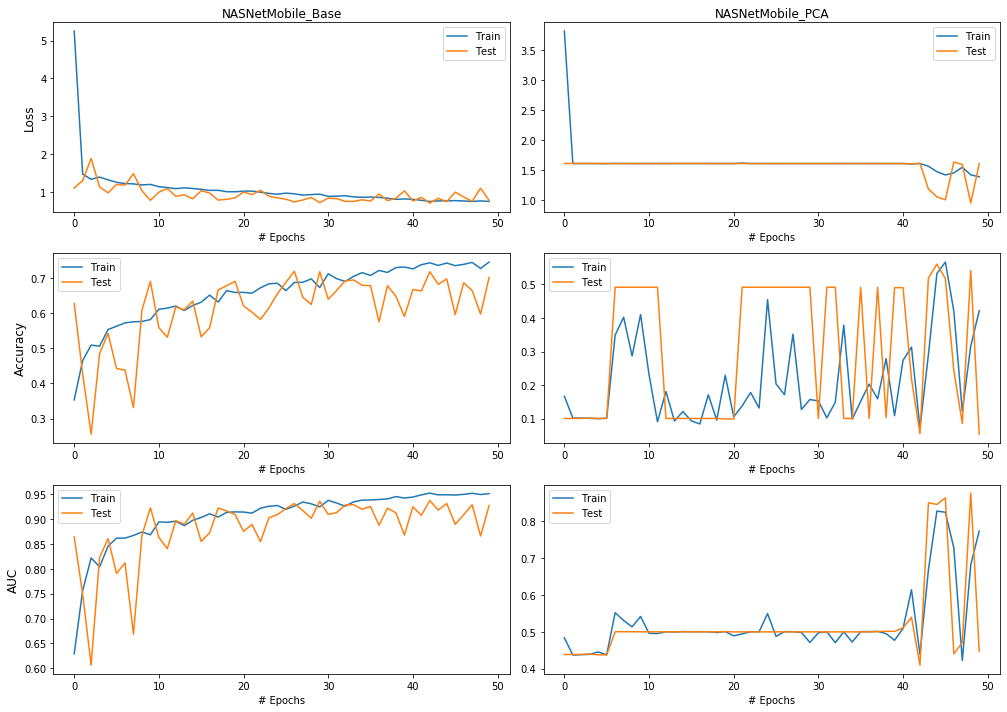

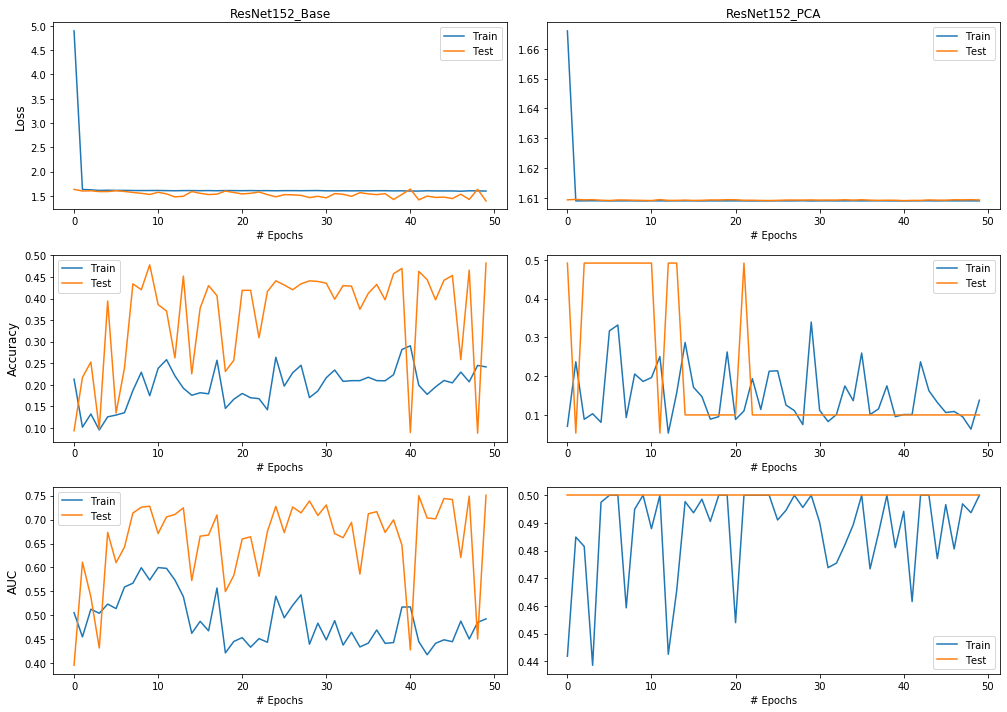

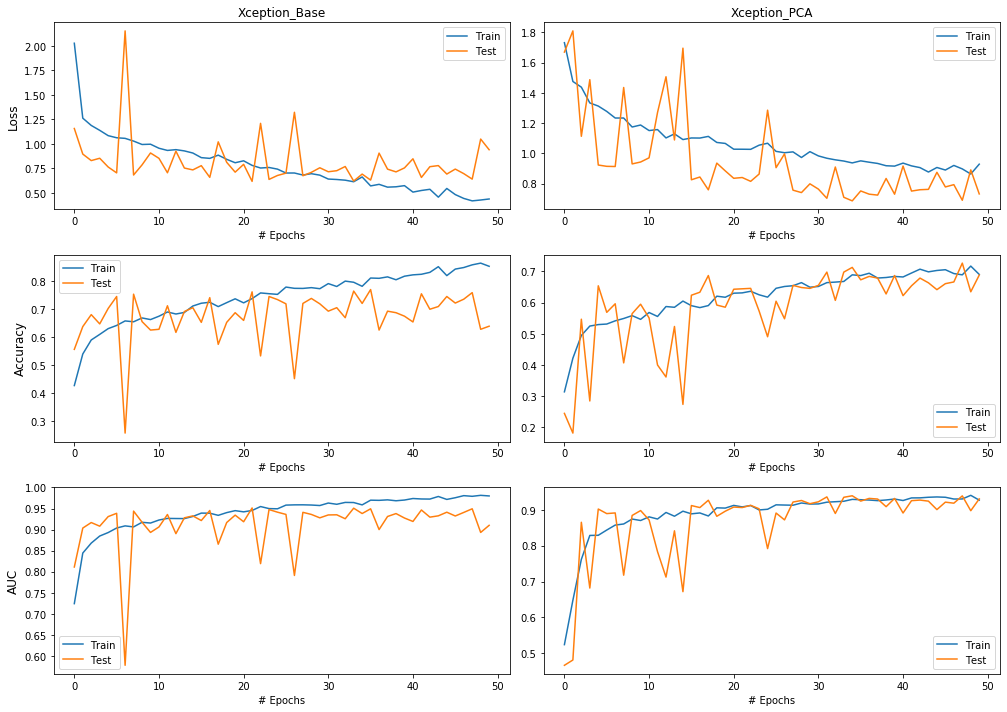

In [54]:
# Visualize model performance
for i in range(len(all_models)):
    model_name = models[i]
    cols = all_models[i]
    model_performance(model_name, cols, rows = ['Loss', 'Accuracy', 'AUC'])

## Model Comparisons
* The chaning trend of AUC scores in training process

The AUC scores in each epoch of all four models are compared.

In [47]:
def model_comparisons(model_name, models, cols = ['Train', 'Test']):
    '''
    model_name: one of the CNN models
    models: all models that are being compared
    cols: mark training set and testing set
    
    This function is used to compare the model performance using the AUC score.
    The results will be stored in the report_image directory.
    '''

    fig, axe = plt.subplots(1,2,figsize=(16,4))
    for ax, col in zip(axe, cols):
        ax.set_title(col, fontsize=12)
    for i in range(2):
        df = histories[models[i]]
        axe[0].plot(np.array(df['auc']))
        axe[1].plot(np.array(df['val_auc']))
    for ax in axe:
        ax.set_xlabel('# Epochs')
        ax.set_ylabel('AUC', rotation=90, fontsize=12)
    axe[1].legend(models, bbox_to_anchor=(1.5, 0.7))
    fig.tight_layout()
    fig.savefig('report_images/' + model_name + '_auc_comparison.png', dpi=200)

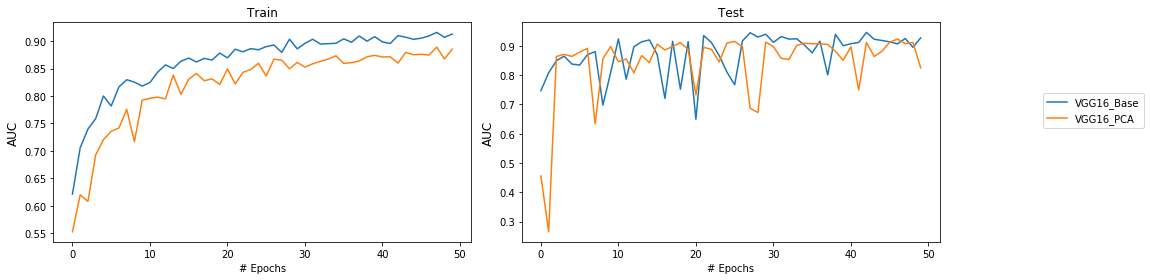

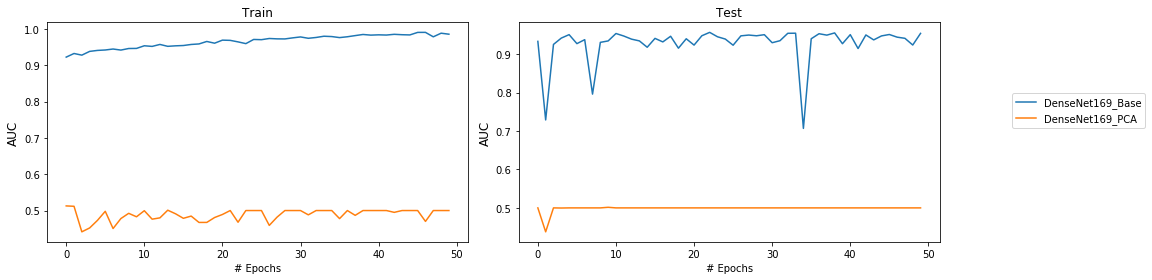

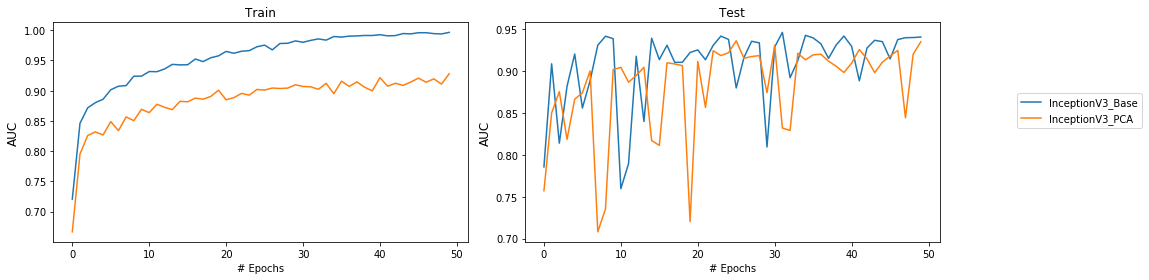

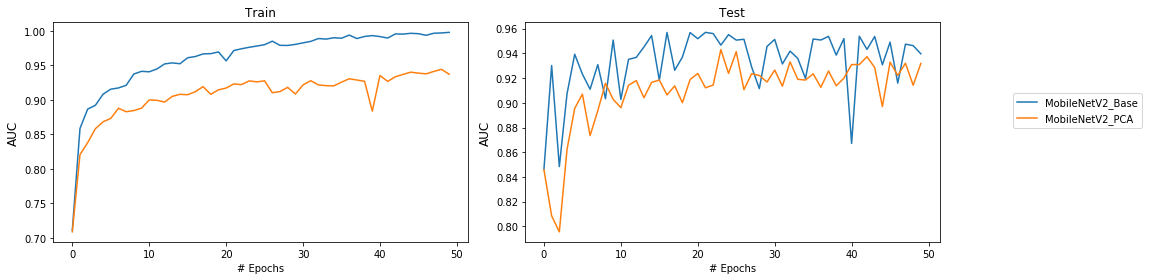

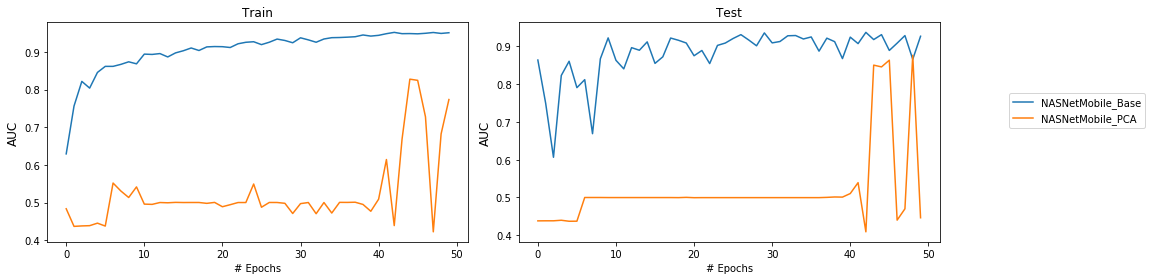

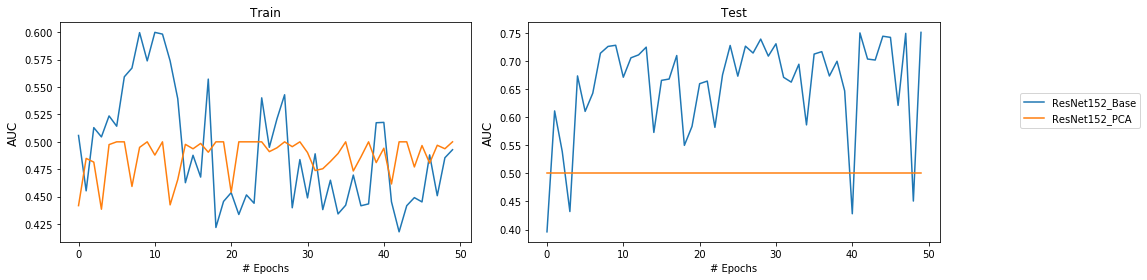

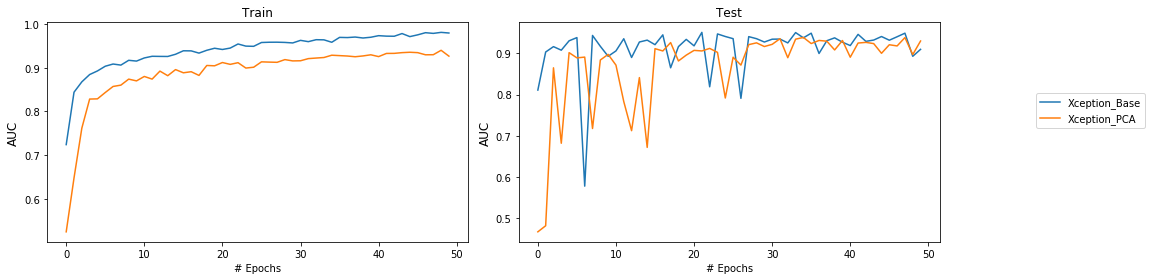

In [48]:
# Visualize model performance
for i in range(len(all_models)):
    model_name = models[i]
    model = all_models[i]
    model_comparisons(model_name, model, cols = ['Train', 'Test'])

In [9]:
def get_AUC(cols, auc = [], val_auc = []):
    for name in cols:
        df = histories[name]
        auc.append(df.loc[49, 'auc'])
        val_auc.append(df.loc[49, 'val_auc'])
    return auc, val_auc

In [10]:
# prepare info of AUC on training set and test set
auc, val_auc = [], []
for cols in all_models:
    auc, val_auc = get_AUC(cols, auc, val_auc)

In [11]:
time_file = os.path.join('Saved_files', 'training_times.csv')
df_time = pd.read_csv(time_file)
train_time = np.array(df_time['training time'][4:])/50

In [14]:
sum_file = os.path.join('Saved_files', 'model_summary.csv')
df_sum = pd.read_csv(sum_file)
para_num = np.array(df_sum['trainable para'])

In [17]:
model_clusters = [models[i] + types[j] for i in range(len(models)) for j in range(len(types))]
model_clusters

['VGG16_Base',
 'VGG16_PCA',
 'DenseNet169_Base',
 'DenseNet169_PCA',
 'InceptionV3_Base',
 'InceptionV3_PCA',
 'MobileNetV2_Base',
 'MobileNetV2_PCA',
 'NASNetMobile_Base',
 'NASNetMobile_PCA',
 'ResNet152_Base',
 'ResNet152_PCA',
 'Xception_Base',
 'Xception_PCA']

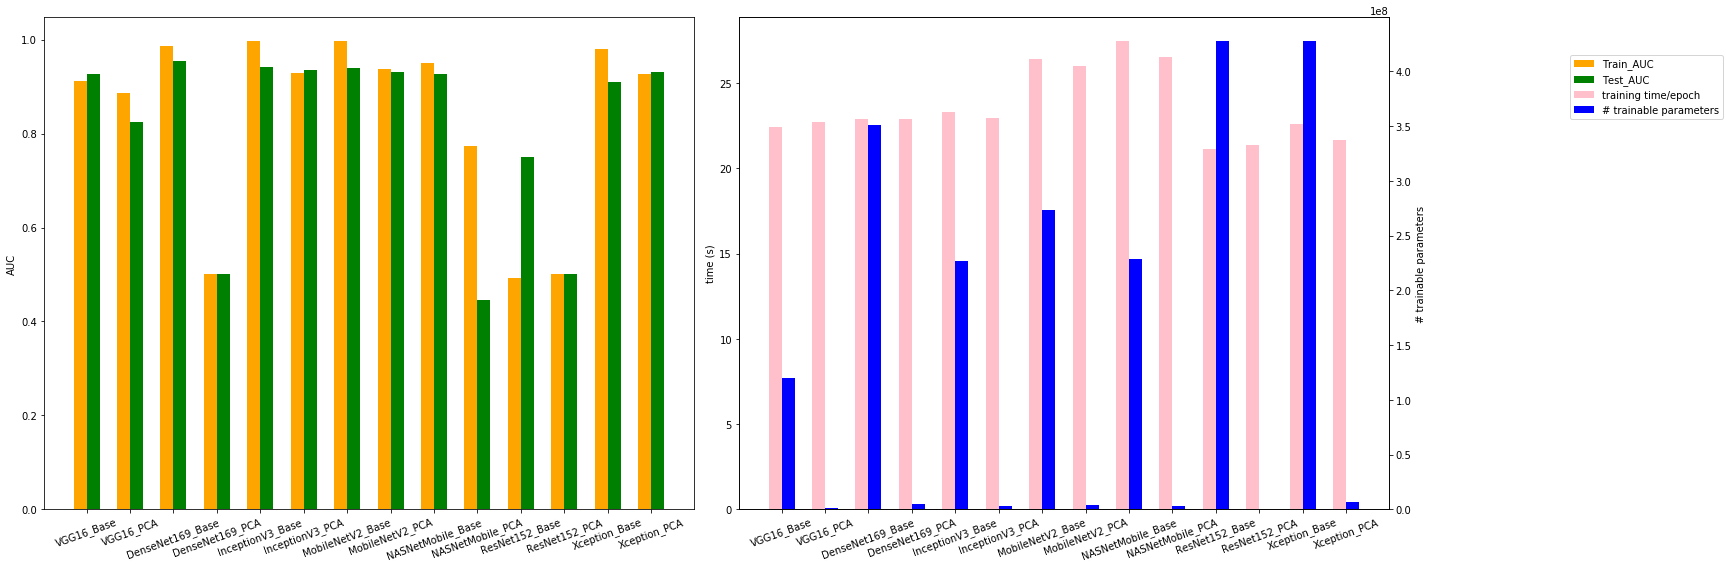

In [28]:
x = np.arange(len(model_clusters))  # the label locations
width = 0.3  # the width of the bars

fig, axe = plt.subplots(1,2,figsize=(20,8))

# axe[0] - AUC
axe[0].bar(x - width/2, auc, width, label='Train_AUC', color='orange')
axe[0].bar(x + width/2, val_auc, width, label='Test_AUC', color='green')

axe[0].set_ylabel('AUC')
axe[0].set_xticks(x)
axe[0].set_xticklabels(model_clusters, rotation=20)

# axe[1] - training time and # param
tax = axe[1].twinx()
axe[1].bar(x - width/2, train_time, width, label='training time/epoch', color='pink')
tax.bar(x + width/2, para_num, width, label='# trainable parameters', color='blue')

axe[1].set_ylabel('time (s)')
tax.set_ylabel('# trainable parameters')
axe[1].set_xticks(x)
axe[1].set_xticklabels(model_clusters, rotation=20)

lgd = fig.legend(bbox_to_anchor=(1.2, 0.9))
fig.tight_layout()
fig.savefig('report_images/deep_model_metrics_comparison', dpi=200, bbox_extra_artists=(lgd,), bbox_inches='tight')